In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
data.mainroad = data.mainroad.map({'yes': 1, 'no': 0})
data.guestroom = data.guestroom.map({'yes': 1, 'no': 0})
data.basement = data.basement.map({'yes': 1, 'no': 0})
data.hotwaterheating = data.hotwaterheating.map({'yes': 1, 'no': 0})
data.airconditioning = data.airconditioning.map({'yes': 1, 'no': 0})
data.prefarea = data.prefarea.map({'yes': 1, 'no': 0})
data.furnishingstatus = data.furnishingstatus.map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
data.head()
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0


In [12]:
Y = data.price
Y = Y.values
Y = Y.reshape(Y.size, 1)

X = data.drop(['price'], axis = 1)
X = X.values

print(X.shape)
print(Y.shape)


(545, 12)
(545, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 0.4, random_state = 42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.4, random_state = 42)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X.shape[1])

(327, 12)
(327, 1)
(88, 12)
(88, 1)
(130, 12)
(130, 1)
12


In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras import regularizers

model = Sequential()
model.add(Dense(300, activation = 'leaky_relu', input_shape = (X.shape[1],),kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(150, activation = 'leaky_relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(45, activation = 'leaky_relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 300)               3900      
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 150)               45150     
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_18 (Dense)            (None, 45)                6795      
                                                                 
 dense_19 (Dense)            (None, 12)                552       
                                                                 
 dense_20 (Dense)            (None, 1)                

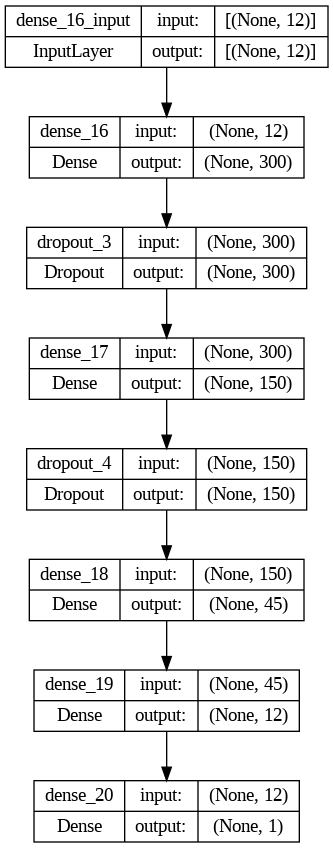

In [40]:
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Yscaler = StandardScaler()
X_train = Xscaler.fit_transform(X_train)
X_test = Xscaler.transform(X_test)
X_valid = Xscaler.transform(X_valid)
Y_train = Yscaler.fit_transform(Y_train)
Y_test = Yscaler.transform(Y_test)
Y_valid = Yscaler.transform(Y_valid)
keras.utils.plot_model(model, show_shapes = True)

In [41]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])
history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 3.5266 - mean_squared_error: 0.7212 - val_loss: 3.5407 - val_mean_squared_error: 0.8418
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 3.1307 - mean_squared_error: 0.5013 - val_loss: 3.0427 - val_mean_squared_error: 0.5092
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 2.9100 - mean_squared_error: 0.4471 - val_loss: 2.9334 - val_mean_squared_error: 0.5665
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 2.6982 - mean_squared_error: 0.3965 - val_loss: 2.8555 - val_mean_squared_error: 0.6415
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 2.5589 - mean_squared_error: 0.4045 - val_loss: 2.6567 - val_mean_squared_error: 0.5825
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 2.3763 - mean_squared_error: 0.3575 - val_loss: 2.4683 - val_mean_squared_error: 0.5248
Epoch 7/100
11/11 [==============

3/3 [==============================] - 0s 5ms/step
[[-0.5507569 ]
 [-0.4240349 ]
 [-0.27458555]
 [ 0.02390821]
 [-0.24592373]
 [-0.7324641 ]
 [-0.7377667 ]
 [ 2.3639193 ]
 [-0.47886252]
 [-0.8647842 ]
 [-0.7036851 ]
 [ 1.0027424 ]
 [ 1.7361985 ]
 [-0.7699422 ]
 [-0.7193199 ]
 [ 1.8200558 ]
 [ 0.21305743]
 [-0.0675144 ]
 [ 2.4367375 ]
 [ 1.4004526 ]
 [ 1.0304497 ]
 [-0.67036265]
 [-0.5616262 ]
 [ 1.9347221 ]
 [-0.79563   ]
 [ 0.06943946]
 [-0.74860543]
 [-0.8634983 ]
 [-0.50012535]
 [-0.4576155 ]
 [ 1.7878305 ]
 [-0.75201637]
 [ 0.72850406]
 [-0.08586153]
 [ 1.0133729 ]
 [ 0.30049896]
 [ 0.01353296]
 [-0.63888854]
 [-0.5198868 ]
 [ 0.65720487]
 [ 0.35652363]
 [-0.47991788]
 [-0.27156413]
 [-0.6673649 ]
 [-0.9786795 ]
 [ 0.0888699 ]
 [-0.22278014]
 [-0.9251282 ]
 [-0.9462719 ]
 [ 0.09946349]
 [ 0.25591356]
 [-0.8968935 ]
 [ 0.38566393]
 [ 1.4673477 ]
 [ 1.7812635 ]
 [-0.67642367]
 [-0.47915316]
 [ 1.0201265 ]
 [ 1.0973499 ]
 [-0.43905973]
 [ 1.0272906 ]
 [-0.5966478 ]
 [ 0.15387362]
 [ 1

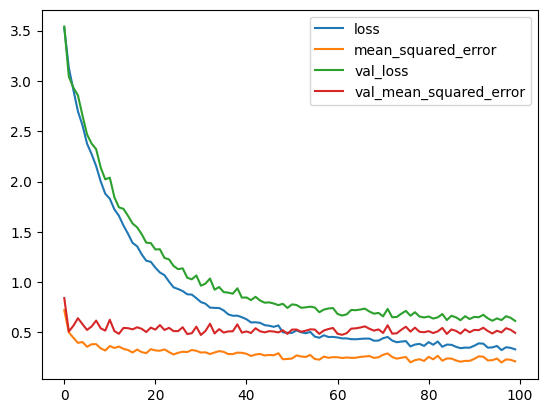

In [44]:
pd.DataFrame(history.history).plot()
test_loss, test_mae = model.evaluate(X_test, Y_test)

Y_proba = model.predict(X_test)
print(Y_proba)
print(test_mae)

In [43]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_proba)

0.6115105044823269